# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Oki Nurul Abada
- **Email:** subagiamisbahudin@gmail.com
- **ID Dicoding:** mariposa

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda tiap tahun?
- Bagaimana distribusi jumlah pelanggan berdasarkan musim?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data
Dataset diupload terlebih dahulu ke halaman pekerjaan (Files) lalu dilanjutkan dengan membaca isi data.

In [3]:
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [16]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [7]:
hour_data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


### Assessing Data

1. Cek informasi pada data untuk mengetahui ada atau tidakkah nilai yang null serta mengetahui format data yang digunakan dari masing-masing kolom

In [18]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Kedua data tidak memiliki nilai null. Namun, terdapat kesalahan tipe tada pada kolom **dteday** dipresentasikan sebagai **object** yang harusnya dipresentasikan sebagai **datetime**. Sekarang akan di cek apakah data memiliki banyak duplikat atau tidak dan melihat informasi statistiknya.

In [20]:
day_data.duplicated().sum()
hour_data.duplicated().sum()

0

In [23]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [24]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


berikut adalah beberapa masalah yang ditemukan.
1. Kolom **dteday** tidak berupa **datetime**
2. Kolom **season** direpresentasikan menggunakan angka, yang alangkah baiknya dipresentasikan dengan kata.

### Cleaning Data

Memperbaiki tipe data yang tidak sesuai

In [25]:
day_data["dteday"] = pd.to_datetime(day_data["dteday"])
hour_data["dteday"] = pd.to_datetime(hour_data["dteday"])

In [26]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [40]:
season_mapping = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

day_data["season"] = day_data["season"].replace(season_mapping)
hour_data["season"] = hour_data["season"].replace(season_mapping)

day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [39]:
day_data[day_data.season == "Spring"].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
hour_data[hour_data.season == "Fall"].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4010,4011,2011-06-21,Fall,0,6,0,0,2,1,1,0.62,0.5909,0.78,0.1642,10,23,33
4011,4012,2011-06-21,Fall,0,6,1,0,2,1,3,0.62,0.5909,0.78,0.1642,2,12,14
4012,4013,2011-06-21,Fall,0,6,2,0,2,1,3,0.62,0.5758,0.83,0.1642,1,5,6
4013,4014,2011-06-21,Fall,0,6,3,0,2,1,3,0.62,0.5758,0.83,0.1642,0,2,2
4014,4015,2011-06-21,Fall,0,6,4,0,2,1,2,0.60,0.5455,0.88,0.1045,2,7,9


## Exploratory Data Analysis (EDA)

### Explore Data Penyewaan Per Tahun

In [64]:
#Informasi Terkait pnyewaan pada tahun 2011
data_2011 = day_data[day_data["dteday"].dt.year == 2011]

data_2011["month"] = data_2011["dteday"].dt.month

rental_month2011 = data_2011.groupby(by="month").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

rental_month2011

<ipython-input-64-601cf16412fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011["month"] = data_2011["dteday"].dt.month


instant     cnt                                      
      nunique     sum   max   min         mean          std
month                                                      
1          31   38189  1985   431  1231.903226   372.432665
2          28   48215  2927  1005  1721.964286   398.508839
3          31   64045  3239   605  2065.967742   550.971716
4          30   94870  5312   795  3162.333333  1042.093593
5          31  135821  5805  2633  4381.322581   572.927883
6          30  143512  5515  3767  4783.733333   444.447812
7          31  141341  6043  3285  4559.387097   680.090762
8          31  136691  5895  1115  4409.387097   809.852401
9          30  127418  5423  1842  4247.266667   965.377251
10         31  123511  5511   627  3984.225806  1103.481844
11         30  102167  4486  1495  3405.566667   788.249290
12         31   87323  3940   705  2816.870968   958.763187

Dari pivot table di atas dapat diketahui bahwa jumlah penyewaan tiap bulan memiliki jarak yang cukup signifikan terlebih pada bulan ke 5 sampai 11 yang mencapai 100 ribu penyewaan, dengan rata-rata perbulannya ada di atas 4000 penyewaan.

In [67]:
#Informasi Terkait pnyewaan pada tahun 2012
data_2012 = day_data[day_data["dteday"].dt.year == 2012]

data_2012["month"] = data_2012["dteday"].dt.month

data_2012.groupby(by="month").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

<ipython-input-67-f4b4fa77da0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2012["month"] = data_2012["dteday"].dt.month


instant     cnt                                      
      nunique     sum   max   min         mean          std
month                                                      
1          31   96744  4521  1301  3120.774194   872.852134
2          29  103137  5062  1529  3556.448276   870.724640
3          31  164875  8362  3194  5318.548387  1251.162682
4          30  174224  7460  1027  5807.466667  1308.938916
5          31  195865  8294  2843  6318.225806  1078.403997
6          30  202830  8120  4127  6761.000000   954.204995
7          31  203607  8173  4459  6567.967742   867.183736
8          31  214503  7865  4549  6919.451613   794.059017
9          30  218573  8714  4073  7285.766667   979.160925
10         31  198841  8156    22  6414.225806  1941.819400
11         30  152664  6852  2277  5088.800000  1129.731198
12         31  123713  6606   441  3990.741935  1803.227864

Pada pivot table tahun 2012 dapat dilihat bahwa penyewaan sepeda sangat tinggi dan masih dalam selisih yang cukup signifikan disetiap bulannya. Dengan penyewaan tertinggi ada pada bulan ke 6 sampai 9 yakni di ata 200 ribu penyewaan dan rata-rata sewa perbulannya ada di angka 6000 lebih

###Explore Data penyewaan per musim

In [54]:
#Informasi Terkait pnyewaan pada tiap musim
hour_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                 
       nunique      sum  max min        mean         std
season                                                  
Fall      4496  1061129  977   1  236.016237  197.711630
Spring    4242   471348  801   1  111.114569  119.224010
Summer    4409   918589  957   1  208.344069  188.362473
Winter    4232   841613  967   1  198.868856  182.967972

In [55]:
day_data.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                      
       nunique      sum   max   min         mean          std
season                                                       
Fall       188  1061129  8714  1115  5644.303191  1459.800381
Spring     181   471348  7836   431  2604.132597  1399.942119
Summer     184   918589  8362   795  4992.331522  1695.977235
Winter     178   841613  8555    22  4728.162921  1699.615261

Dapat diketahui bahwa jumlah penyewaan tertinggi ada pada musim gugur (Fall), dengan rata-rata penyewaan perjamnya adalah 236 penyewaan dan 5644 penyewaan perharinya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda tiap tahun?

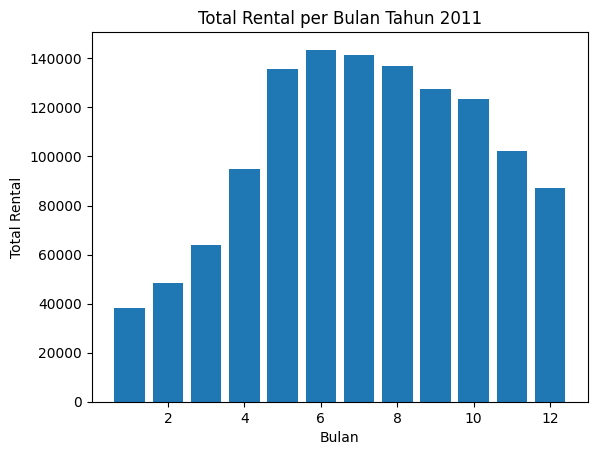

In [69]:
rental_month2011 = data_2011.groupby("month")['cnt'].sum()
rental_month2012 = data_2012.groupby("month")['cnt'].sum()

plt.bar(rental_month2011.index, rental_month2011)
plt.xlabel('Bulan')
plt.ylabel('Total Rental')
plt.title('Total Rental per Bulan Tahun 2011')

plt.show()

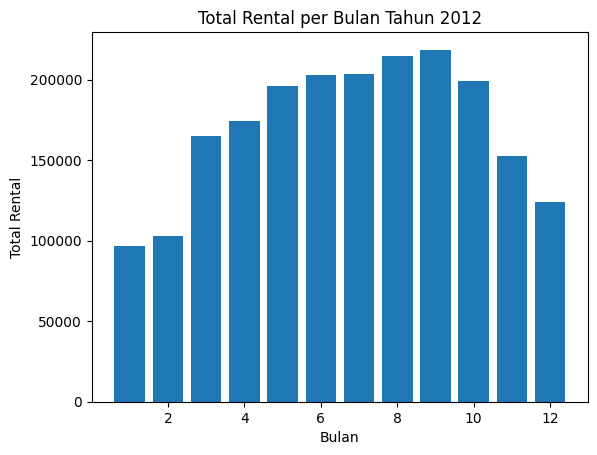

In [77]:
plt.bar(rental_month2012.index, rental_month2012)
plt.xlabel('Bulan')
plt.ylabel('Total Rental')
plt.title('Total Rental per Bulan Tahun 2012')

plt.show()

### Pertanyaan 2: Bagaimana distribusi jumlah penyewaan berdasarkan musim?

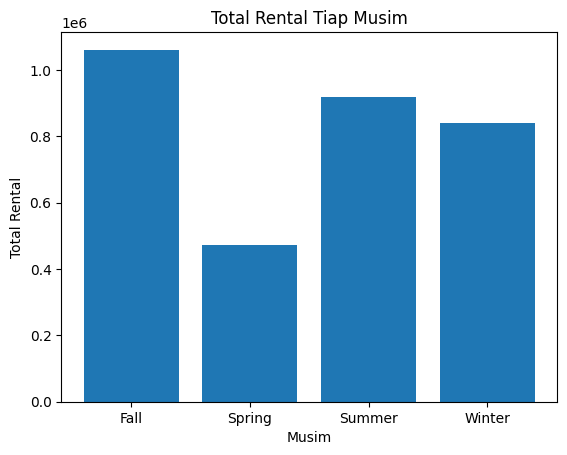

In [75]:
rental_season = hour_data.groupby("season")['cnt'].sum()
plt.bar(rental_season.index, rental_season)
plt.xlabel('Musim')
plt.ylabel('Total Rental')
plt.title('Total Rental Tiap Musim')

plt.show()

In [78]:
day_data.to_csv("daydf.csv", index=False)
hour_data.to_csv("hourdf.csv", index=False)

## Conclusion

- Bagaimana tren penyewaan sepeda tiap tahun?
  Berdasarkan visualisasi data tahun 2012 mengalami pelonjakan penyewaan yang tajam dari tahun 2011 dan pada bulan 5 - 11 pada tahun 2011 merupakan bulan yang mencapai penyewaan tertinggi sedangkan pada tahun 2012 ada pada bulan 5 - 10

- Bagaimana distribusi jumlah penyewaan berdasarkan musim?
  Musim Gugur menjadi musim terbanyak terjadinya penyewaan dan musim semi menjadi penyewaan terkecil